In [218]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

from datetime import datetime
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Binance API endpoint for historical data
api_url = 'https://api.binance.com/api/v3/klines'

# Parameters for the API request (Bitcoin, 1 day interval, 1000 data points)
symbol = 'BTCUSDT'
interval = '1d'
limit = 1000

params = {
    'symbol': symbol,
    'interval': interval,
    'limit': limit
}

# Send GET request to Binance API
response = requests.get(api_url, params=params)
data = response.json()

In [219]:
# Extracting relevant data from the API response
df = pd.DataFrame(
    data, columns=[
        'openTime',
        'open',
        'high',
        'low',
        'close',
        'volume',
        'closeTime',
        'quoteAssetVolume',
        'numberOfTrades',
        'takerBuyBaseAssetVolume',
        'takerBuyQuoteAssetVolume',
        'ignore'
    ]
)

df.head()

# Renaming columns for clarity
df.columns = [
    'Open Time',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Close Time',
    'Quote Asset Volume', 
    'Number of Trades',
    'Taker Buy Base Asset Volume',
    'Taker Buy Quote Asset Volume',
    'Ignore'
]
df.drop(
    ['Close Time',
    'Quote Asset Volume',
    'Number of Trades',
    'Taker Buy Base Asset Volume',
    'Taker Buy Quote Asset Volume', 
    'Ignore'],
    axis=1, inplace=True
)

# Converting timestamps to datetime format
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')

# Converting columns to numeric for further manipulation
cols = df.columns.drop('Open Time')
cols
df[cols] = df[cols].apply(pd.to_numeric)


df.shape


(1000, 6)

In [222]:
df['Close'][:100]

0     43794.37
1     46253.40
2     45584.99
3     45511.00
4     44399.00
        ...   
95    64774.26
96    64122.23
97    64380.00
98    65519.10
99    63606.74
Name: Close, Length: 100, dtype: float64

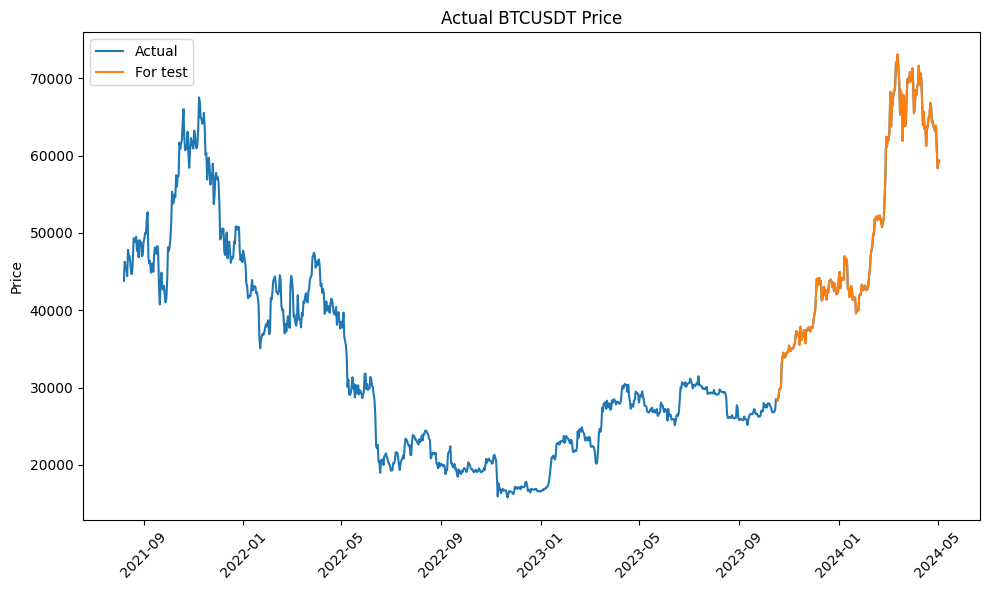

In [220]:
plt.figure(figsize=(10, 6))
plt.title('Actual {} Price'.format(symbol))
plt.plot(df['Open Time'], df['Close'], label='Actual')
plt.plot(df['Open Time'][800:], df['Close'][800:], label='For test')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

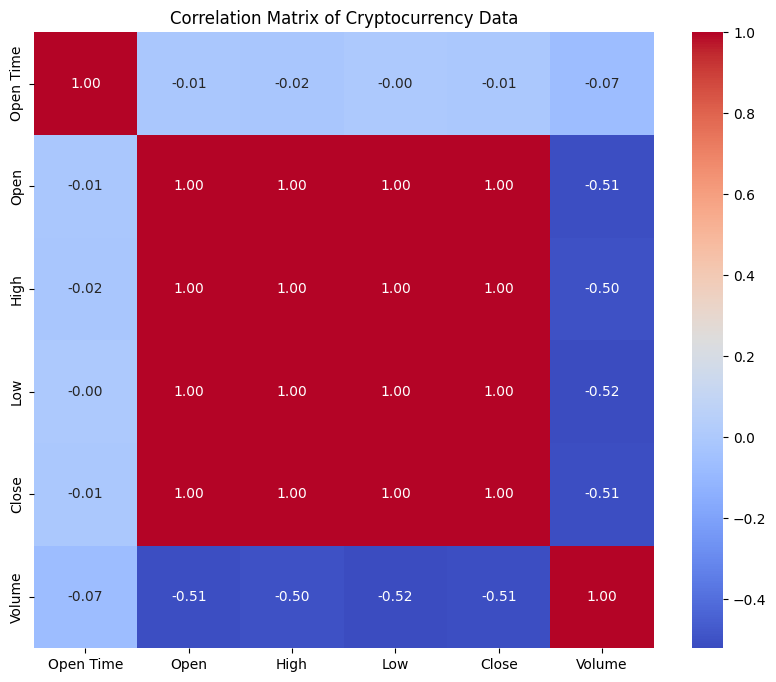

In [223]:
correlation_matrix = df.corr()

# Plotting correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Cryptocurrency Data')
plt.show()

In [221]:
correlation_matrix['Close']

Open Time   -0.008680
Open         0.996506
High         0.998524
Low          0.998378
Close        1.000000
Volume      -0.510360
Name: Close, dtype: float64

Mean Squared Error: 2438897.597063626


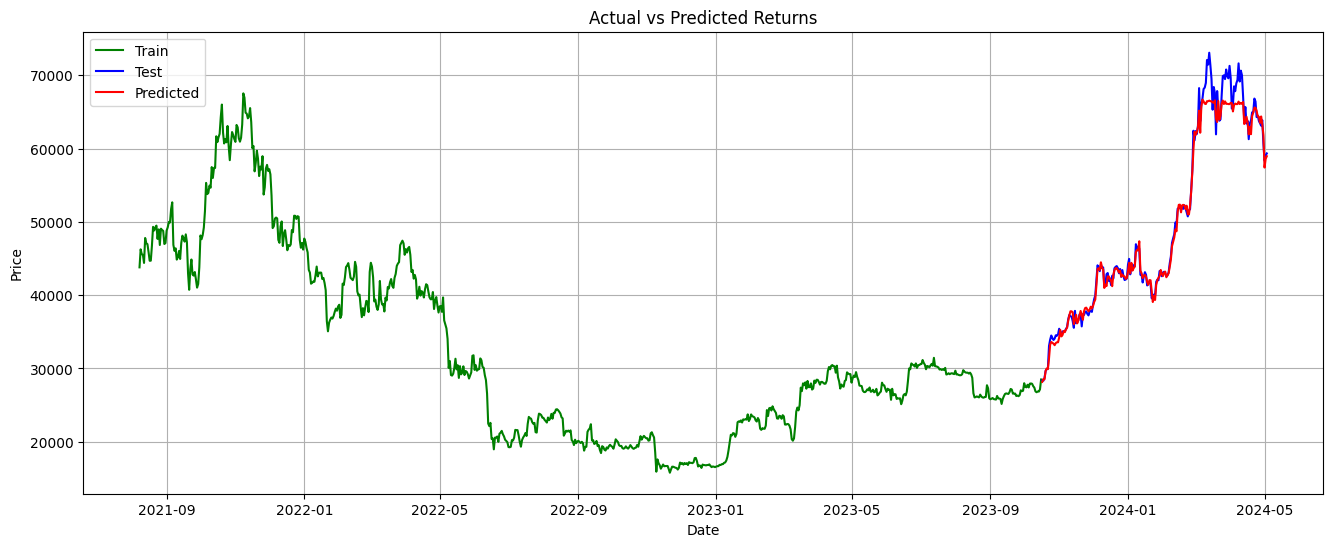

In [224]:
X = df[['Open', 'High', 'Low', 'Volume']]  # Exclude 'Close'
y = df['Close'] 

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


# Plot actual vs predicted returns
plt.figure(figsize=(16, 6))
plt.plot(df['Open Time'][:800], y_train, label='Train', color='green')
plt.plot(df['Open Time'][800:], y_test, label='Test', color='blue')
plt.plot(df['Open Time'][800:], y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Returns')
plt.legend()
plt.grid(True)
plt.show()

In [225]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Convert predicted_prices to numpy array and cast to float for compatibility
# predicted_prices_np = np.array(predicted_prices, dtype=float)

print(f"Mean Absolute Error (MAE): {mae}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 959.8702359999962
MAPE: 1.714061309798208
Mean Squared Error (MSE): 2438897.597063626
Root Mean Squared Error (RMSE): 1561.6970247341915
R-squared (R2) Score: 0.9849858008809035


Mean Squared Error: 4062716.2914678375


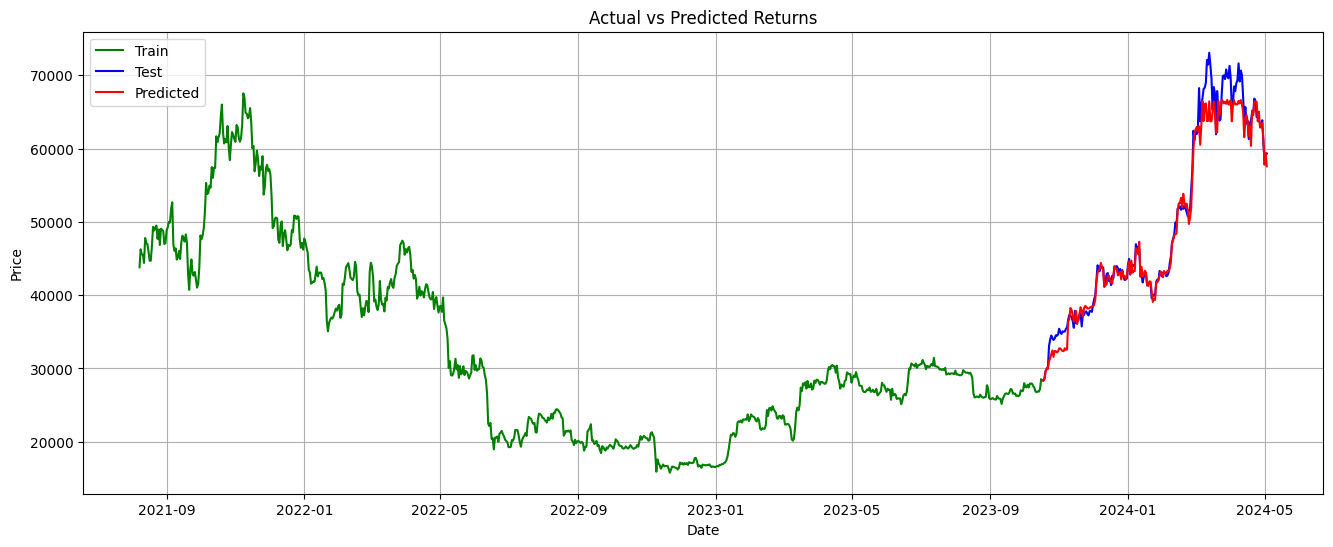

In [226]:
X = df[['Open', 'High', 'Low', 'Volume']]  # Exclude 'Close'
y = df['Close'] 

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a random forest regressor
rf_model = XGBRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


# Plot actual vs predicted returns
plt.figure(figsize=(16, 6))
plt.plot(df['Open Time'][:800], y_train, label='Train', color='green')
plt.plot(df['Open Time'][800:], y_test, label='Test', color='blue')
plt.plot(df['Open Time'][800:], y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Returns')
plt.legend()
plt.grid(True)
plt.show()

In [227]:
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Convert predicted_prices to numpy array and cast to float for compatibility
# predicted_prices_np = np.array(predicted_prices, dtype=float)

print(f"Mean Absolute Error (MAE): {mae}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 1314.7191140625
MAPE: 2.496436251800118
Mean Squared Error (MSE): 4062716.2914678375
Root Mean Squared Error (RMSE): 2015.6180916701055
R-squared (R2) Score: 0.9749893429564503


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error: 470368.89201155753


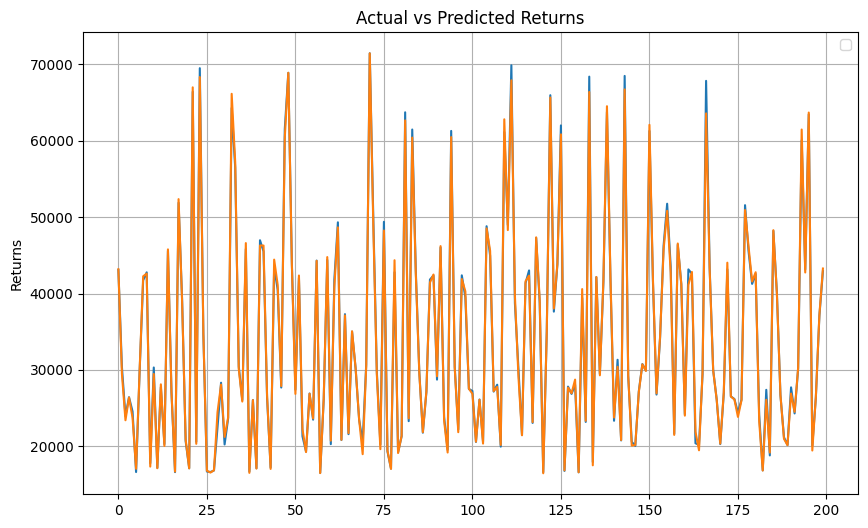

In [228]:
X = df[['Open', 'High', 'Low', 'Volume']]  # Exclude 'Close'
y = df['Close'] 

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


# Plot actual vs predicted returns
plt.figure(figsize=(10, 6))

plt.plot([i for i in range(len(y_test))], y_test)
plt.plot([i for i in range(len(y_test))], y_pred)
# plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Actual vs Predicted Returns')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


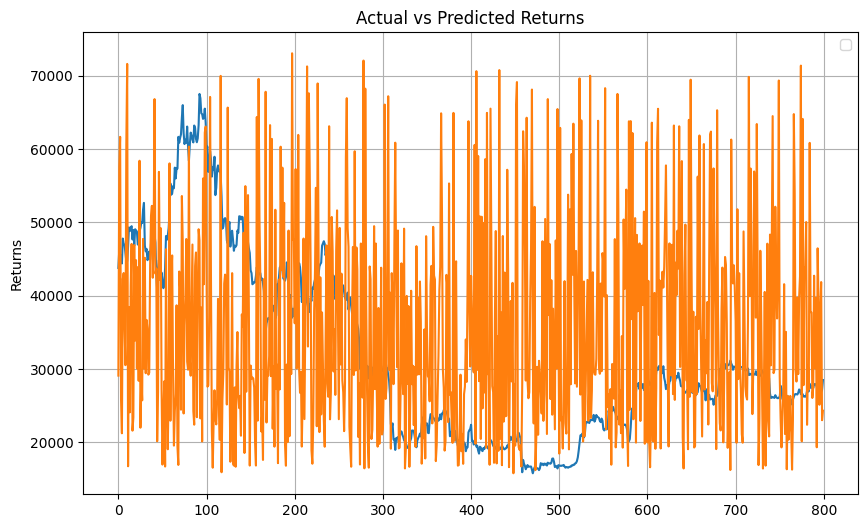

In [229]:
plt.figure(figsize=(10, 6))

plt.plot([i for i in range(len(y_train))], df["Close"][:800])
plt.plot([i for i in range(len(y_train))], y_train)
# plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Actual vs Predicted Returns')
plt.legend()
plt.grid(True)
plt.show()

In [230]:
print(type(y_test))
print(type(y_train))
print(type(y_pred))
print(type(df['Close']))
print(y_train)
print(df['Close'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
276    29103.94
107    57541.27
68     61672.42
755    25869.51
320    21237.69
         ...   
675    25128.60
836    37408.34
154    41864.62
538    23022.60
556    24324.05
Name: Close, Length: 800, dtype: float64
0      43794.37
1      46253.40
2      45584.99
3      45511.00
4      44399.00
         ...   
995    63866.00
996    60672.00
997    58364.97
998    59060.61
999    59337.14
Name: Close, Length: 1000, dtype: float64


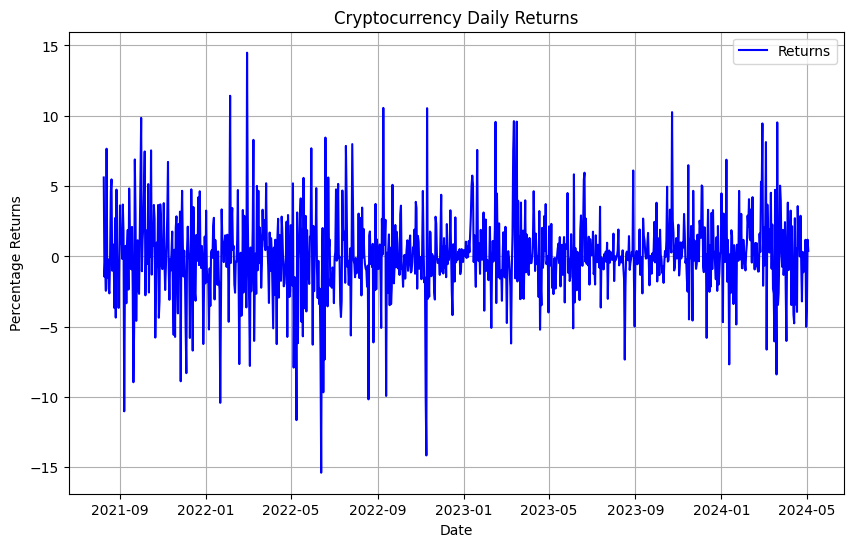

     Open Time   Returns
1   2021-08-09  5.614945
2   2021-08-10 -1.445105
3   2021-08-11 -0.162312
4   2021-08-12 -2.443365
5   2021-08-13  7.660082
..         ...       ...
995 2024-04-29  1.184088
996 2024-04-30 -5.001096
997 2024-05-01 -3.802462
998 2024-05-02  1.191879
999 2024-05-03  0.394696

[999 rows x 2 columns]


In [ ]:
df['Returns'] = df['Close'].pct_change()*100
df['Returns'].describe
df['Close']

# Handle NaN values if any
df.dropna(subset=['Returns'], inplace=True)

# Plot the returns
plt.figure(figsize=(10, 6))
plt.plot(df['Open Time'], df['Returns'], label='Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Percentage Returns')
plt.title('Cryptocurrency Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, you can print the DataFrame to see the calculated returns
print(df[['Open Time', 'Returns']])

Epoch 1/50


/home/nurlan/projects/crypto_prediction/binance/bitcoin_using_RF/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0185 - val_loss: 0.0021
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.6246e-04 - val_loss: 0.0011
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.6962e-04 - val_loss: 0.0012
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.9350e-04 - val_loss: 8.8873e-04
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8618e-04 - val_loss: 8.9537e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.3489e-04 - val_loss: 0.0010
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.3190e-04 - val_loss: 7.7398e-04
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.6999e-04 - val_loss: 0.0013
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.4809e-04 - val_loss: 8.4578e-04
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.4328e-04 - val_loss: 0.0011
Epoch 12/50
25/25 ━━━━

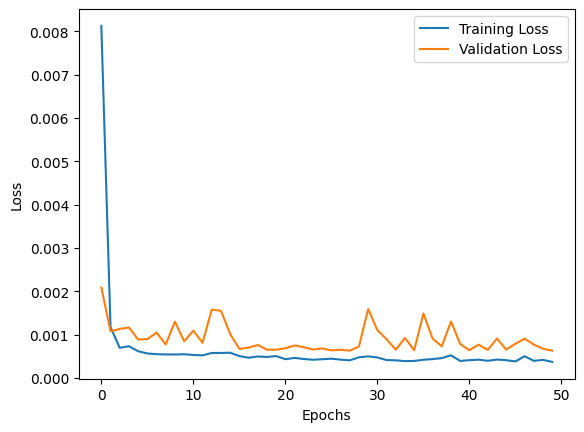

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


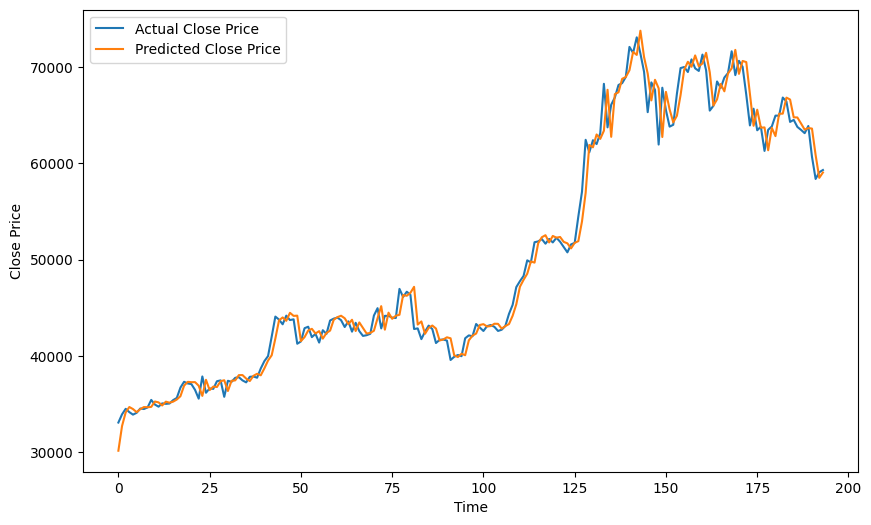

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load cryptocurrency data from Binance platform
# Assuming you have loaded the data into a DataFrame named 'df'

# Selecting relevant columns
data = df[['Open', 'High', 'Low', 'Volume', 'Close']]

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Define the number of previous time steps to use for prediction
lookback = 30  # You can adjust this value as needed

# Function to create input and output sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback, -1])  # Assuming 'Close' is the target
    return np.array(X), np.array(y)

# Create sequences for training
X, y = create_sequences(data_normalized, lookback)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the GRU model
model = Sequential()
model.add(GRU(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict using the model
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_train_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], y_train.reshape(-1, 1)), axis=1))[:, -1]
y_pred_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred.reshape(-1, 1)), axis=1))[:, -1]
y_test_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Close Price')
plt.plot(y_pred_inv, label='Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()



ValueError: x and y must have same first dimension, but have shapes (195,) and (194,)

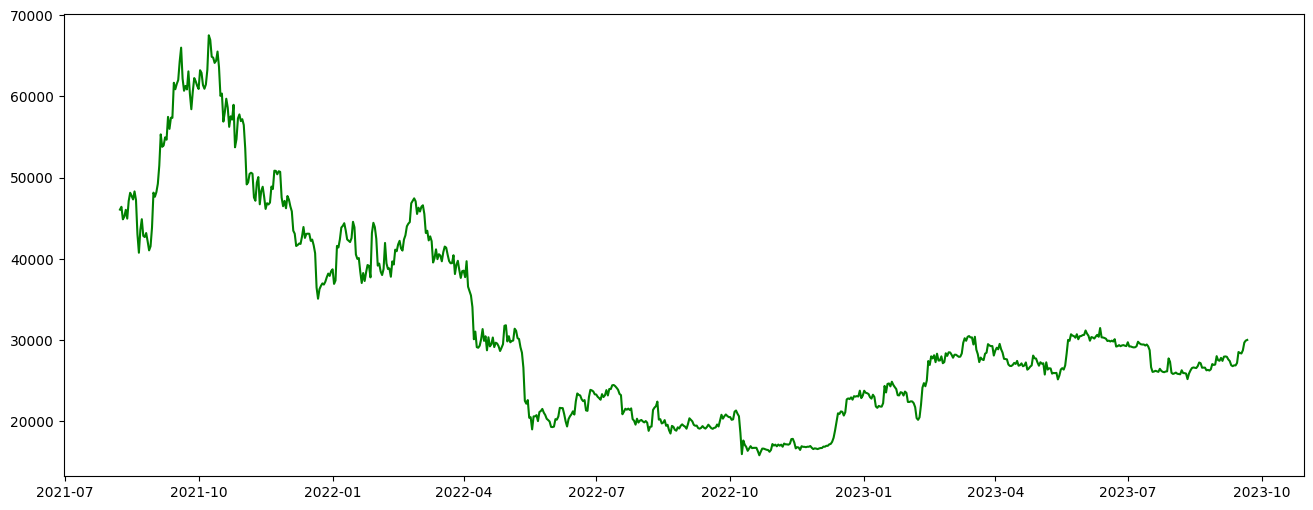

In [231]:
# Plot actual vs predicted returns
plt.figure(figsize=(16, 6))
plt.plot(df['Open Time'][:775], y_train_inv, label='Train', color='green')
plt.plot(df['Open Time'][805:], y_test_inv, label='Test', color='blue')
plt.plot(df['Open Time'][805:], y_pred_inv, label='Predicted', color='red')
# plt.plot(y_test_inv, label='Actual Close Price')
# plt.plot(y_pred_inv, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Returns')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mae = mean_absolute_error(y_test_inv, y_pred_inv)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inv, y_pred_inv)

# Calculate R-squared (R2) score
r2 = r2_score(y_test_inv, y_pred_inv)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Convert predicted_prices to numpy array and cast to float for compatibility
# predicted_prices_np = np.array(predicted_prices, dtype=float)

print(f"Mean Absolute Error (MAE): {mae}")
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
print("MAPE:", mape)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 1037.0562985386061
MAPE: 1.9806559275838336
Mean Squared Error (MSE): 2358179.4790786337
Root Mean Squared Error (RMSE): 1535.6365061689025
R-squared (R2) Score: 0.9846964381475962
